# 케라스 창시자에게 배우는 딥러닝
https://github.com/gilbutITbook/006975

In [ ]:
# 저자는 2.2.2임
import keras
keras.__version__

'2.4.3'

# 5.1 - 합성곱 신경망 소개

이 노트북은 [케라스 창시자에게 배우는 딥러닝](https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/) 책의 5장 1절의 코드 예제입니다. 책에는 더 많은 내용과 그림이 있습니다. 이 노트북에는 소스 코드에 관련된 설명만 포함합니다.

----

컨브넷의 정의와 컨브넷이 컴퓨터 비전 관련 작업에 잘 맞는 이유에 대해 이론적 배경을 알아보겠습니다. 하지만 먼저 간단한 컨브넷 예제를 둘러 보죠. 2장에서 완전 연결 네트워크로 풀었던(이 방식의 테스트 정확도는 97.8%였습니다) MNIST 숫자 이미지 분류에 컨브넷을 사용해 보겠습니다. 기본적인 컨브넷이더라도 2장의 완전 연결된 모델의 성능을 훨씬 앞지를 것입니다.

다음 코드는 기본적인 컨브넷의 모습입니다. `Conv2D`와 `MaxPooling2D` 층을 쌓아 올렸습니다. 잠시 후에 이들이 무엇인지 배우겠습니다.

컨브넷이 `(image_height, image_width, image_channels)` 크기의 입력 텐서를 사용한다는 점이 중요합니다(배치 차원은 포함하지 않습니다). 이 예제에서는 MNIST 이미지 포맷인 `(28, 28, 1)` 크기의 입력을 처리하도록 컨브넷을 설정해야 합니다. 이 때문에 첫 번째 층의 매개변수로 `input_shape=(28, 28, 1)`을 전달합니다.

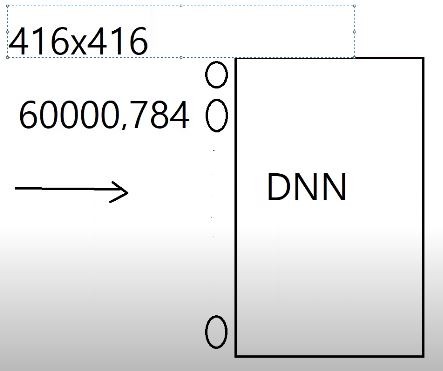

In [ ]:
from IPython.display import Image
Image('/DeepLearningModel.JPG')

Deep Learning Model 설명 ↑
- DNN: Deep Neural Network
- MNIST Input 특징: (60000, 28*28) -> (60000, 784)
- ㅇ인 노드의 갯수가 784개
- 만약 이미지의 사이즈가 416*416이 되면, 노드의 갯수도 416*416개가 됨 (영상 쪽은 해상도가 올라갈 수록 노드의 갯수가 기하급수적으로 늘어남)
- DNN 안에 들어있는 것이 Feature Extractor와 Classifier가 있음
- CNN은 Feature Extractor를 크게 나누면 convolution과 MaxPooling

In [ ]:
from keras import layers
from keras import models

# CNN은 Feature Extractor + Classification(분류기) 2가지로 구성되어있음

# 모델을 Sequential로 쌓은 후, convolution->maxpooling->convolution->maxpooling->convolution
model = models.Sequential()
# 아래부분을 Feature Extractor라고 부름
# CNN은 Feature Extractor를 크게 나누면 convolution과 MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 2차원이라 Conv2D사용(2차원의 원본 이미지랑 2차원의 filter를 convolution함)
# layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)): 2차원 이미지 28*28를 3*3 filter 32개와 convolution함
# ↑결과:  (None, 26, 26, 32) = (이미지 장수는 아직 정해지지 않아서 None, 이미지가 26*26, filter 32개)
# convolution 공식: o = ((i+2p-k)/s) + 1, i: input image size = 28, p:padding = 0, k: filter size = 3, s: stride = 1 



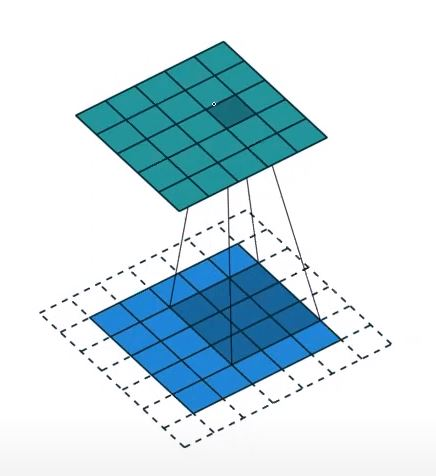

In [ ]:
# convolution해서 feature map 나오는 과정
# 사진에서는 input인 원본이미지가 5*5, filter가 3*3, 결과물인 feature map가 5*5가 됨
from IPython.display import Image
Image('/convolution.JPG')

# 출처: https://images.app.goo.gl/4WxZWUqmSNnQwQm8A

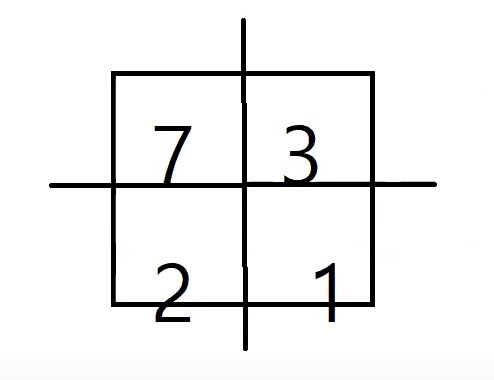

In [ ]:
# maxpooling 설명
# 아래 그림을 maxpooling하면 제일 큰 수인 7만 출력. 따라서, 2*2 이미지가 1*1로 바뀜
from IPython.display import Image
Image('/maxpooling.JPG')

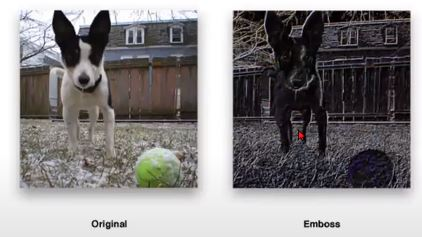

In [ ]:
# emboss가 강조가 되서 나오는 필터(개의 윤곽이 도드라짐, 개의 feature를 잘 찾아낼 수 있음)
# 딥러닝에서 랜덤한 필터값을 넣고, emboss하는 filter를 찾아냄
from IPython.display import Image
Image('/filter_ex.JPG')

지금까지 컨브넷 구조를 출력해 보죠:

In [ ]:
# summary(): layer를 잘 쌓았는지, parameter갯수 확인 가능(tensorflow에서는 계산했어야함)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)): 2차원 이미지 28*28를 3*3 filter 32개와 convolution함
* 결과:  (None, 26, 26, 32) = (이미지 장수는 아직 정해지지 않아서 None, 이미지가 26*26, filter 32개)
* 참고: convolution 공식: o = ((i+2p-k)/s) + 1, i: input image size = 28, p:padding = 0, k: filter size = 3, s: stride = 1 
* 학습해야할 parameter: 320개

(None, 26, 26, 32) → (None, 13, 13, 32) : Maxpooling하면 결과가 반으로 쪼갬, filter의 갯수는 그대로
 * Maxpooling할때는 학습해야할 parameter가 없어서 0임


 ex. 얼굴 사진 CNN 
 * 처음엔 큰 이미지에서 아주 작은부분의 feature를 추출 ex. 눈동자, 눈썹 등
 * 계속 convolution, maxpooling을 할 수록, 점점 큰 윤곽에 대한 feature를 추출

참고(maxpooling):  (None, 11, 11, 64) -> (None, 5, 5, 64)
* 원래 반으로 쪼갤 수 없는데, 알아서 계산해줌 

`Conv2D`와 `MaxPooling2D` 층의 출력은 `(height, width, channels)` 크기의 3D 텐서입니다. 높이와 넓이 차원은 네트워크가 깊어질수록 작아지는 경향이 있습니다. 채널의 수는 `Conv2D` 층에 전달된 첫 번째 매개변수에 의해 조절됩니다(32개 또는 64개).

다음 단계에서 마지막 층의 (`(3, 3, 64)` 크기인) 출력 텐서를 완전 연결 네트워크에 주입합니다. 이 네트워크는 이미 익숙하게 보았던 `Dense` 층을 쌓은 분류기입니다. 이 분류기는 1D 벡터를 처리하는데 이전 층의 출력이 3D 텐서입니다. 그래서 먼저 3D 출력을 1D 텐서로 펼쳐야 합니다. 그다음 몇 개의 `Dense` 층을 추가합니다:

In [ ]:
# classifier
model.add(layers.Flatten()) # Flatten layer
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # class 10개로

10개의 클래스를 분류하기 위해 마지막 층의 출력 크기를 10으로 하고 소프트맥스 활성화 함수를 사용합니다. 이제 전체 네트워크는 다음과 같습니다:

In [ ]:
model.summary() # feature extractor + classifier 모두 나옴 -> CNN

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

여기에서 볼 수 있듯이 `(3, 3, 64)` 출력이 `(576,)` 크기의 벡터로 펼쳐진 후 `Dense` 층으로 주입되었습니다.

이제 MNIST 숫자 이미지에 이 컨브넷을 훈련합니다. 2장의 MNIST 예제 코드를 많이 재사용하겠습니다.

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape하고 타입 바꾸고, 정규화함
# 정규화: 0~1사이로 바꾸는 것
# 타입을 float를 바꾸는 이유: 정규화하면서 정밀도 유지하기 위해
# (원래 int형을 0~1로 바꾸는데, float로 바꿔야지 0~1사이에서 정밀도가 높게 나옴(int형일 땐, 0과 1밖에 없음))
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.1771 - acc: 0.9441
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0476 - acc: 0.9850
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0332 - acc: 0.9896
Epoch 4/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0248 - acc: 0.9923
Epoch 5/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0195 - acc: 0.9943


테스트 데이터에서 모델을 평가해 보죠:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 32us/step


In [ ]:
# tensorflow로 하면 99% 나오기 어려움
test_acc

0.9921

2장의 완전 연결 네트워크는 97.8%의 테스트 정확도를 얻은 반면, 기본적인 컨브넷은 99.2%의 테스트 정확도를 얻었습니다. 에러율이 (상대적으로) 64%나 줄었습니다. 나쁘지 않군요!

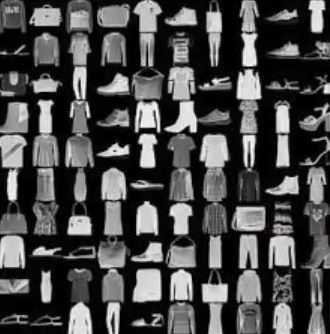

In [ ]:
# 나중에 fashion mnist로도 해보기, 이미지 사이즈 똑같음
from IPython.display import Image
Image('/fashion_mnist.JPG')

In [ ]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 38s 8ms/step - loss: 0.7752 - accuracy: 0.7142
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.3534 - accuracy: 0.8704
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.2888 - accuracy: 0.8936
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.2544 - accuracy: 0.9071
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.2336 - accuracy: 0.9147


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.2781 - accuracy: 0.9006


In [ ]:
# fashion_mnist는 accuracy가 줄어듦
test_acc

0.900600016117096

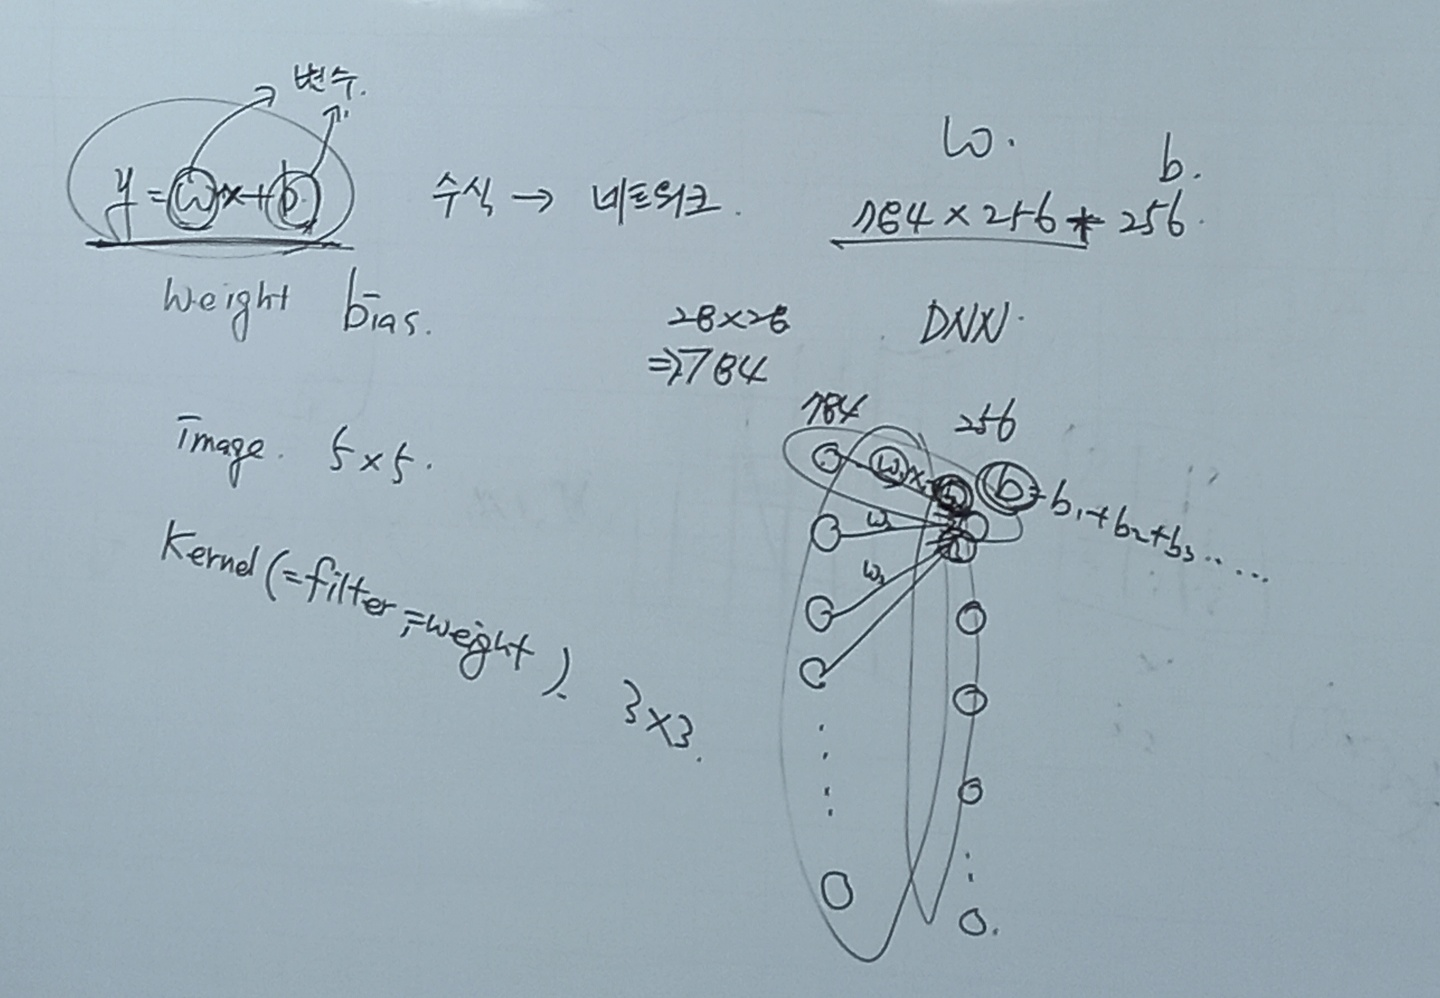

In [ ]:
# 질문: parameter가 weight라고 했는데.. 이해가 안가요
from IPython.display import Image
Image('/parameter.jpg')